In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Numerical Simulation of Poisson's equation en R = {(x,y)/ 0 <= x <= 2, 0 <= y <= 1}

# Boundary conditions:

""" u(x,0) = x  si 0 < x < 2
    u(x,4) = ex  si 0 < x < 2
    u(0,y) = 0  si 0 < y < 1
    u(4,y) = 2e^y  si 0 < y < 1
"""
# Defining the rectangle where the equation is defined: 

a = 2 # x vary between 0 & 2
b = 1 # y vary between 0 & 1

# Defining the steps of the mesh

h = 1/4 # Step in variable x
k = 1/2 # Step in variable y

# Defining the mesh:

n = int(a/h) # Nº intervals in axis x
m = int(b/k) # Nº intervals in axis y
x_i = np.arange(0,a+h,h) # Partition in the x variable
y_j = np.arange(0,b+k,k) # Partition in the y variable
n_points = (m+1)*(n+1) # Nº points of the mesh

# Constructing the A matrix which will represent the equation system to obtain the approaches of the mesh.

A = np.zeros((n_points,n_points)) # Initialization, the dimension is n_points x n_points (1 equation for each point)

for j in range(n_points):
    if(j < n+1): # Equations for the bottom side of the rectangle
        A[j][j] = 1
    elif (j % (n+1) == 0 or j % (n+1) == n): # Equations for both lateral sides
        A[j][j] = 1
    elif (j > (n+1)*m): # Equations for the top side of the rectangle
        A[j][j] = 1
    else : # Equations for internal points of the rectangle
        A[j][j-1] = 1/h**2
        A[j][j+1] = 1/h**2
        A[j][j-(n+1)] = 1/h**2
        A[j][j+(n+1)] = 1/h**2
        A[j][j] = -4/h**2

# Constructing B vector

B = np.zeros(n_points)

# Introducing boundary conditions

for i in range(n_points):
    if(i < n+1): # Equations for the bottom side of the rectangle
        B[i] = x_i[i]
    elif (i % (n+1) == 0 and i != 0): # Equations for the first column
        B[i] = 0
    elif (i % (n+1) == n and i != 0): # Equations for the last column 
        B[i] = 2*np.exp(y_j[int(i/(n+1))])
    elif (i > (n+1)*m and i != n_points-1): # Equations for the top side of the rectangle
        B[i] = np.exp(1)*x_i[i%(n+1)]

# Once we have A & B we have obtained the system AX = B for getting X

X = np.linalg.inv(A).dot(B)

# Reshape vector X to show it.

X_matrix = np.reshape(X, ((m+1),(n+1)))

# Numerical Solution

df_1 = pd.DataFrame(X_matrix, columns = x_i, index = y_j)
display(df_1)

# Analytical Solution

sol_analitica = np.zeros((m+1,n+1))

for j in range(m+1):
    for i in range(n+1):
        sol_analitica[j][i] = x_i[i]*np.exp(y_j[j])
        
# Showing the analytical solution

df_2 = pd.DataFrame(sol_analitica, columns = x_i, index = y_j)
display(df_2)

,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00
0.0,0.0,0.250000,0.500000,0.750000,1.000000,1.250000,1.500000,1.750000,2.000000
0.5,0.0,0.464746,0.929416,1.393775,1.856972,2.315830,2.758496,3.140733,3.297443
1.0,0.0,0.679570,1.359141,2.038711,2.718282,3.397852,4.077423,4.756993,5.436564


,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00
0.0,0.0,0.25000,0.500000,0.750000,1.000000,1.250000,1.500000,1.750000,2.000000
0.5,0.0,0.41218,0.824361,1.236541,1.648721,2.060902,2.473082,2.885262,3.297443
1.0,0.0,0.67957,1.359141,2.038711,2.718282,3.397852,4.077423,4.756993,5.436564


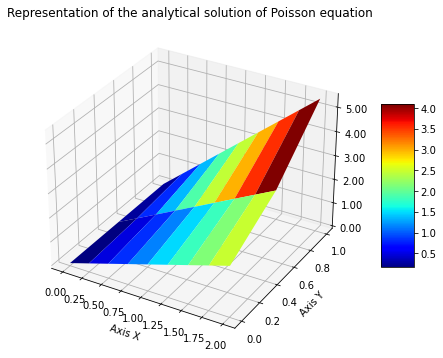

In [3]:
fig = plt.figure(figsize=(10,6))
# Type of figure
ax = fig.gca(projection='3d')
# Data
X, T = np.meshgrid(x_i, y_j);
# Value in (x,y)
Z = np.array(sol_analitica.astype(float));
# Plotting surface
surf = ax.plot_surface(X, T, Z, rstride=1, cstride=1,cmap='jet')
# Customize axis z
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('Axis X')
ax.set_ylabel('Axis Y')
ax.set_title('Representation of the analytical solution of Poisson equation')
# Aggregate a barcolor
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

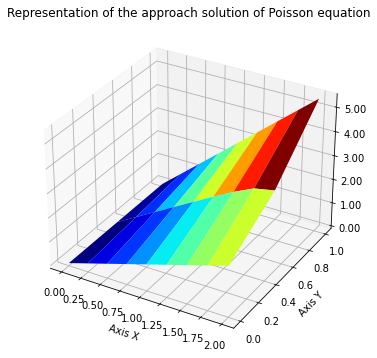

In [4]:
fig = plt.figure(figsize=(10,6))
# Type of figure
ax = fig.gca(projection='3d')
# Data
X, T = np.meshgrid(x_i, y_j);
# Value in (x,y)
Z = np.array(X_matrix.astype(float));
# Plotting surface
surf = ax.plot_surface(X, T, Z, rstride=1, cstride=1,cmap='jet')
# Customize axis z
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('Axis X')
ax.set_ylabel('Axis Y')
ax.set_title('Representation of the approach solution of Poisson equation')
# Aggregate a barcolorfig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
